# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, classification_report


### Loading the data  [1 Mark]

In [85]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
df = pd.read_csv('credit_risk_dataset.csv')
print(df.head(5))


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [86]:
# Get the shape of the dataframe
print(df.isnull().sum())
print("Dataset shape : ",df.shape)



person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Dataset shape :  (32581, 12)


In [87]:
# Display few rows of the dataframe
print(df.head(10))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   
8          24          83000                  RENT                8.0   
9          21          10000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            

In [88]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
summary_stats =  df.describe()
print(summary_stats)

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [89]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
# ToDo
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [90]:
# Display the total number of null values of each column
missing_value_col = df.isnull().sum()
print(missing_value_col)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [91]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
df['person_emp_length']= df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate']= df['loan_int_rate'].fillna(df['loan_int_rate'].median())






In [92]:
missing_value_col = df.isnull().sum()
print(missing_value_col)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


#### Handling categorical columns [3 Marks]

In [93]:
# Check for categorical columns
print(df.dtypes)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns :",categorical_cols)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
Categorical columns : Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [94]:
# Get the distinct categories present in each categorical column
for col in categorical_cols :
    print(f"unique categories in '{col}' {df[col].unique()}")

unique categories in 'person_home_ownership' ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
unique categories in 'loan_intent' ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
unique categories in 'loan_grade' ['D' 'B' 'C' 'A' 'E' 'F' 'G']
unique categories in 'cb_person_default_on_file' ['Y' 'N']


In [95]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
home_ownership_mapping = {'RENT' : 0, 'MORTGAGE':1, 'OWN':2, 'OTHER':3}
loan_intent_mapping = {'PERSONAL' : 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBITCONSOLIDATION':5}
loan_grade_mapping = {'A': 0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
default_person_mapping = {'N':0, 'Y':1}

df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['loan_grade'] = df['loan_grade'].map(loan_grade_mapping)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(default_person_mapping)

# with LabelEncoder
# le = LabelEncoder()
# for col in ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']:
#     df[col] = le.fit_transform(df[col])

print(df.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      2                5.0   
2          25           9600                      1                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0          0.0           3      35000          16.02            1   
1          1.0           1       1000          11.14            0   
2          2.0           2       5500          12.87            1   
3          2.0           2      35000          15.23            1   
4          2.0           2      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                          1           

In [14]:
# Map categorical values to numbers using respective dictionaries
# ToDo

In [96]:
# Display the data to observe the changes
print(df.head(5))
#print(df.sample(5))

   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      2                5.0   
2          25           9600                      1                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0          0.0           3      35000          16.02            1   
1          1.0           1       1000          11.14            0   
2          2.0           2       5500          12.87            1   
3          2.0           2      35000          15.23            1   
4          2.0           2      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                          1           

#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

loan_status
0    25473
1     7108
Name: count, dtype: int64
loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


/tmp/ipykernel_9075/4098839297.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'],palette="viridis")


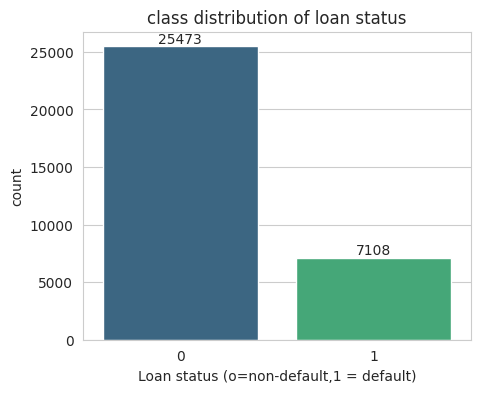

In [98]:
# Calculate the class distribution
class_distrubution = df['loan_status'].value_counts()
print(class_distrubution)

class_percentage = df['loan_status'].value_counts(normalize=True) * 100
print(class_percentage)

# Create a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(5,4))
sns.countplot(x=df['loan_status'],palette="viridis")
plt.xlabel("Loan status (o=non-default,1 = default)")
plt.ylabel("count")
plt.title("class distribution of loan status")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
plt.show()

### Define target variable and features [1 Mark]

In [40]:
# Define features(X) and target variable(y)
# ToDo

### Train-Test split [1 Mark]

In [99]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: X_train={X_train.shape}, y_train=y_train.shape")
print(f"Testing set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(26064, 11), y_train=y_train.shape
Testing set: X_test=(6517, 11), y_test=(6517,)


### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [100]:
# Calculate the class distribution in the training set
class_distrubution = y_train.value_counts(normalize=True) * 100
print("Class Distribution in Training set (%) :")
print(class_distrubution)

Class Distribution in Training set (%) :
loan_status
0    78.184469
1    21.815531
Name: proportion, dtype: float64


In [101]:
# Calculate the class distribution in the testing set
class_distrubution_test = y_test.value_counts(normalize=True) * 100
print("Class Distribution in testing set (%) : ")
print(class_distrubution_test)

Class Distribution in testing set (%) : 
loan_status
0    78.180144
1    21.819856
Name: proportion, dtype: float64


### Feature Scaling [1 Mark]

In [102]:
# Initialize StandardScaler and transform the training and testing features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
print("Standardization Complete. Training and testing sets are not scaled.")


Standardization Complete. Training and testing sets are not scaled.


### Model Training [3 Mars]


In [103]:
# Initialize the LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)
print("Logistic Regression model initialized : ", log_reg_model)
# Fit the model with the SCALED training data
log_reg_model.fit(X_train_scaled, y_train)
print("Logistic Regression Model has been trained successfully.")

Logistic Regression model initialized :  LogisticRegression(random_state=42)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [106]:
# Initialize the DecisionTreeClassifier model

df_model = DecisionTreeClassifier(random_state=42)
print( "Decision Tree Classifier model initialized :",df_model)


# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

Decision Tree Classifier model initialized : DecisionTreeClassifier(random_state=42)


In [107]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
print("Random Forest Classifier model initialized : ",rf_model)

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

Random Forest Classifier model initialized :  RandomForestClassifier(random_state=42)


### Model Evaluation [2 Marks]


In [114]:
# Make predictions on the test set with each of the models above
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_df = df_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [116]:
# Evaluate each of the model performance
def evalueate_model(model_name, y_test, y_pred):
    print(f"----{model_name} Performance -----")
    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Precision: {precision_score(y_test, y_pred): .4f}")
    print(f"Recall: {recall_score(y_test, y_pred): .4f}")
    print(f" F1-Score : {f1_score(y_test, y_pred): .4f}")
# Show accuracy, f1 score, precision, & recall for each of the trained models
evalueate_model("Logistic Regression", y_test, y_pred_log_reg)
evalueate_model("Decision Tree", y_test, y_pred_df)
evalueate_model("Random Forest", y_test, y_pred_rf)

NameError: name 'y_pred_log_reg' is not defined

### Inference [2 Marks]

In [50]:
# Create a sample input dictionary with keys as feature names and values as feature values
# ToDo

# Convert the sample input dictionary into a dataframe to feed to the model
# ToDo

In [51]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
# ToDo

In [52]:
# Make prediction using the defined function using the sample input
# ToDo